In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Code for using data in Jupyter Notebook/Labs
# df = pd.read_csv('../Datasets/univariate_profits_and_populations_from_the_cities.csv')
# df.head() # To get first n rows from the dataset default value of n is 5
# M=len(df)
# M

# Code for using csv in google colab
file_path = 'C:/Users/nicocorb/Downloads/ECGR4105/HW1.csv'
df = pd.read_csv(file_path)

# df = pd.read_csv('../Datasets/New folder/univariate_profits_and_populations_from_the_cities.csv')
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

100

In [26]:
X1 = df.values[:, 0]
X2 = df.values[:, 1]
X3 = df.values[:, 2]
Y = df.values[:, 3]

In [27]:
m = len(Y)

In [28]:
X_0 = np.ones((m, 1))
X_01 = X1.reshape(m, 1)
X_02 = X2.reshape(m, 1)
X_03 = X3.reshape(m, 1)

In [29]:
X_1 = np.hstack((X_0, X_01))
X_2 = np.hstack((X_0, X_02))
X_3 = np.hstack((X_0, X_03))

X_1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [30]:
theta = np.zeros(2)

In [31]:
def compute_cost(X, Y, theta):
 """
 Compute cost for linear regression.
 Input Parameters
 ----------------
 X : 2D array where each row represent the training example and each column represent
 m= number of training examples
 n= number of features (including X_0 column of ones)
 y : 1D array of labels/target value for each traing example. dimension(1 x m)
 theta : 1D array of fitting parameters or weights. Dimension (1 x n)
 Output Parameters
 -----------------
 J : Scalar value.
 """
 predictions = X.dot(theta)
 errors = np.subtract(predictions, Y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history


In [302]:
def plotting_regression_costLoss(X, iterations, cost_history):
    plt.subplot(1,2,1)
    plt.scatter(X[:,1], Y, color='b', marker= '+', label= 'Training Data')
    plt.plot(X[:,1],X.dot(theta), color='r', label='Linear Regression')
    plt.rcParams["figure.figsize"] = (10,6)

    plt.xlabel('Input Variable')
    plt.ylabel('Output Variable')
    plt.title('Linear Regression')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(1, iterations + 1),cost_history, color='blue')
    plt.rcParams["figure.figsize"] = (10,6)
    # plt.grid()
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost (J)')
    plt.title('Convergence of gradient descent')

In [33]:
iterations = 1000

In [37]:
cost_X1 = compute_cost(X_1, Y, theta)

theta = [0, 0]

theta, cost_history_X1 = gradient_descent(X_1, Y, theta, 0.01, iterations)
print('X1 set cost for theta1 and theta2 =', cost_X1)
print('Final value of theta =', theta)

X1 set cost for theta1 and theta2 = 1.0364360799429273
Final value of theta = [ 5.29294728 -1.79119079]


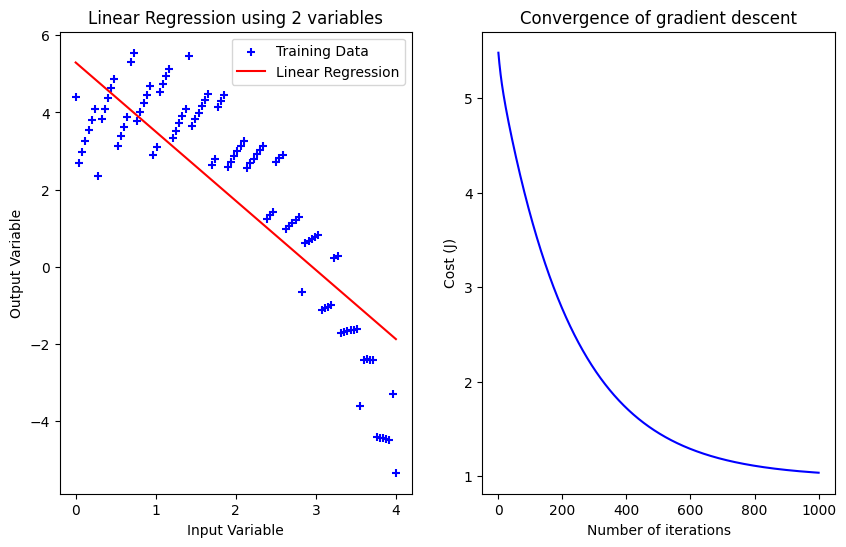

In [38]:
plotting_regression_costLoss(X_1, iterations, cost_history_X1)

In [40]:
cost_X2 = compute_cost(X_2, Y, theta)

theta = [0, 0]

theta, cost_history_X2 = gradient_descent(X_2, Y, theta, 0.1, iterations)
print('X2 set cost for theta1 and theta2 =', cost_X2)
print('Final value of theta =', theta)

X2 set cost for theta1 and theta2 = 3.599366018168043
Final value of theta = [0.73606043 0.55760761]


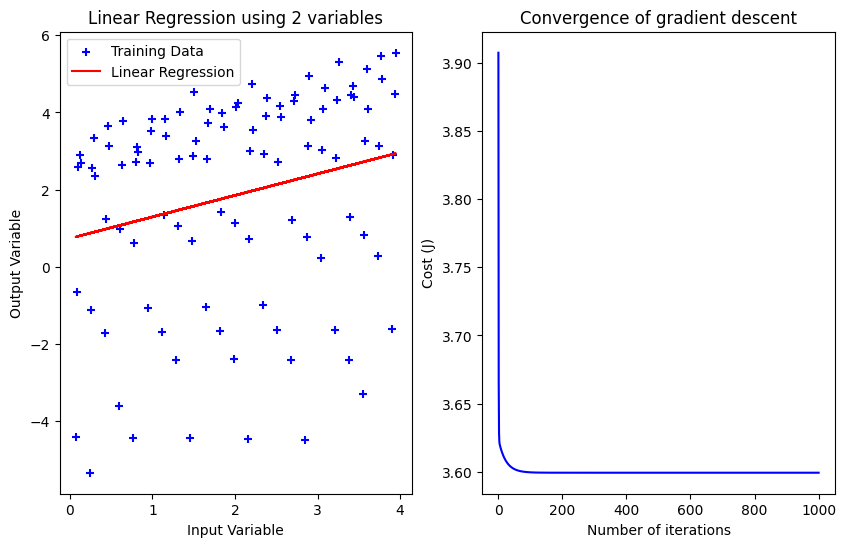

In [41]:
plotting_regression_costLoss(X_2, iterations, cost_history_X2)

In [42]:
cost_X3 = compute_cost(X_3, Y, theta)

theta = [0, 0]

theta, cost_history_X3 = gradient_descent(X_3, Y, theta, 0.05, iterations)
print('X3 set cost for theta1 and theta2 =', cost_X3)
print('Final value of theta =', theta)

X3 set cost for theta1 and theta2 = 4.407877431406763
Final value of theta = [ 2.87138935 -0.52046993]


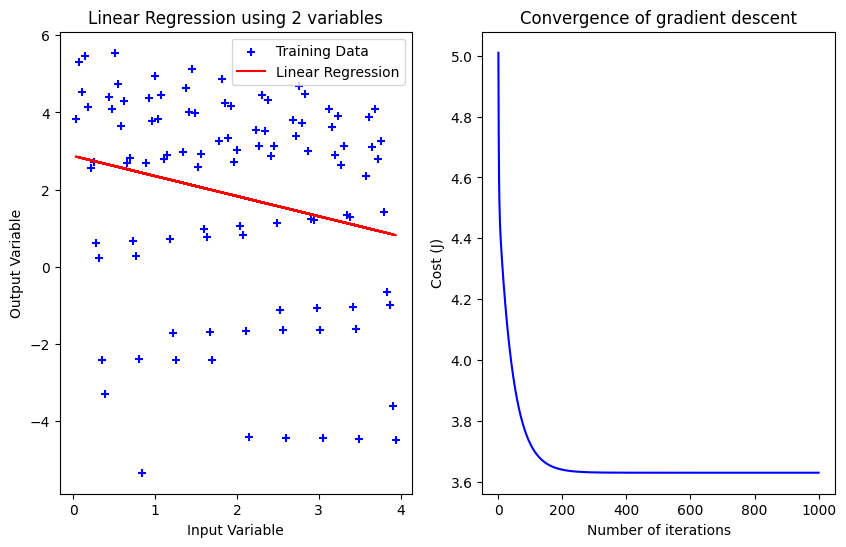

In [43]:
plotting_regression_costLoss(X_3, iterations, cost_history_X3)

In [189]:
def compute_cost_reg(X, Y, theta, lambda_=0):
    """
    Compute cost with L2 regularization.
    """
    m = len(Y)
    predictions = X.dot(theta)
    errors = predictions - Y
    sqrErrors = np.square(errors)
    
    # Regularization term (skip theta[0] to avoid penalizing the bias)
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    
    J = (1 / (2 * m)) * np.sum(sqrErrors) + reg_term
    return J

In [194]:
def gradient_descent_reg(X, y, theta, alpha, iterations, lambda_=0):
    """
    Gradient descent with L2 regularization.
    """
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / m) * (X.T.dot(errors))

        # Regularization for theta[1:] (do NOT regularize theta[0])
        reg = (lambda_ / m) * theta
        reg[0] = 0  # No regularization for bias term

        theta = theta - alpha * (gradient + reg)
        cost_history[i] = compute_cost_reg(X, y, theta, lambda_)

    return theta, cost_history

In [195]:
#Putting X1, X2, and X3 in an array
X_fullSet = df[['X1', 'X2', 'X3']].values

#Putting Y in an array and shapping it in a column format for processing
Y_fullSet = df['Y'].values.reshape(-1, 1)

In [196]:
#features must be scaled to normalized values for processing
X_mean = X_fullSet.mean(axis = 0)
X_std = X_fullSet.std(axis = 0)
X_normalized = (X_fullSet - X_mean) / X_std

#reshaping normalized values for processing
X_finalFeat = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

In [300]:
iterations2 = 100
lambda0 = 0.01

cost_X_finalFeat = compute_cost_reg (X_finalFeat, Y_fullSet, theta, lambda0)

theta = np.zeros((X_finalFeat.shape[1], 1))

theta, cost_history_X_finalFeat = gradient_descent_reg(X_finalFeat, Y_fullSet, theta, 0.1, iterations2, lambda0)
print('X_finalFeat set cost for theta =', cost_X_finalFeat)
print('Final value of theta =', theta)

X_finalFeat set cost for theta = 0.7387638730934423
Final value of theta = [[ 1.85122648]
 [-2.33660671]
 [ 0.62103042]
 [-0.30744258]]


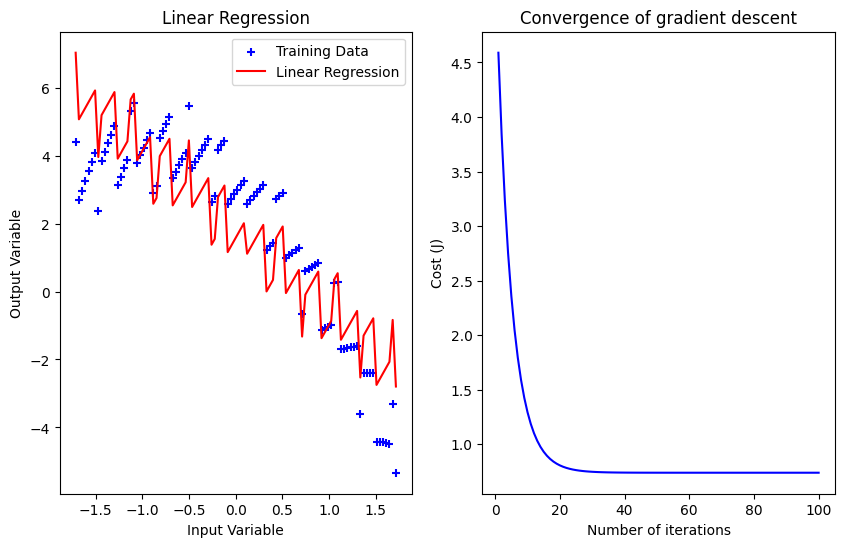

In [303]:
plotting_regression_costLoss(X_finalFeat, iterations2, cost_history_X_finalFeat)